In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')
import sys
from helpers import *

In [2]:
all_data, combined_data = get_fmri_data()

> Run FGES once on each subject with no subsamples with varying sparsity, average over 16 subjects, check for which sparsity maximizes number of edges at 90% frequency (allowing one subject to not have the adjacency) - keep track of number of edges in each graph (general density at that sparsity level)

> each run vs each subject, let either 2 runs or 1 person to fail (around 90%), maximize number of edges at 90%

> keep track of number of edges in each graph

# Per subject (combined data)

In [3]:
sparsity_params = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
avg_adj_mats_per_s = []
avg_num_edges_per_s = []

for s in sparsity_params:
    avg_num_edges = 0
    adj_mats = []
    fges_results = []
    for subj_data in combined_data.values():
        edges, _ = fges_infer_edges(subj_data, s)
        edges_mat = fges_edges_to_mat(edges, subj_data.shape[1])
        adj_mats.append(edges_mat)
        avg_num_edges += np.sum(edges_mat)
    
    avg_adj_mats_per_s.append(np.mean(adj_mats, axis=0))
    avg_num_edges_per_s.append(avg_num_edges/len(combined_data))

Edges with >90% agreement across subjects per sparsity parameter


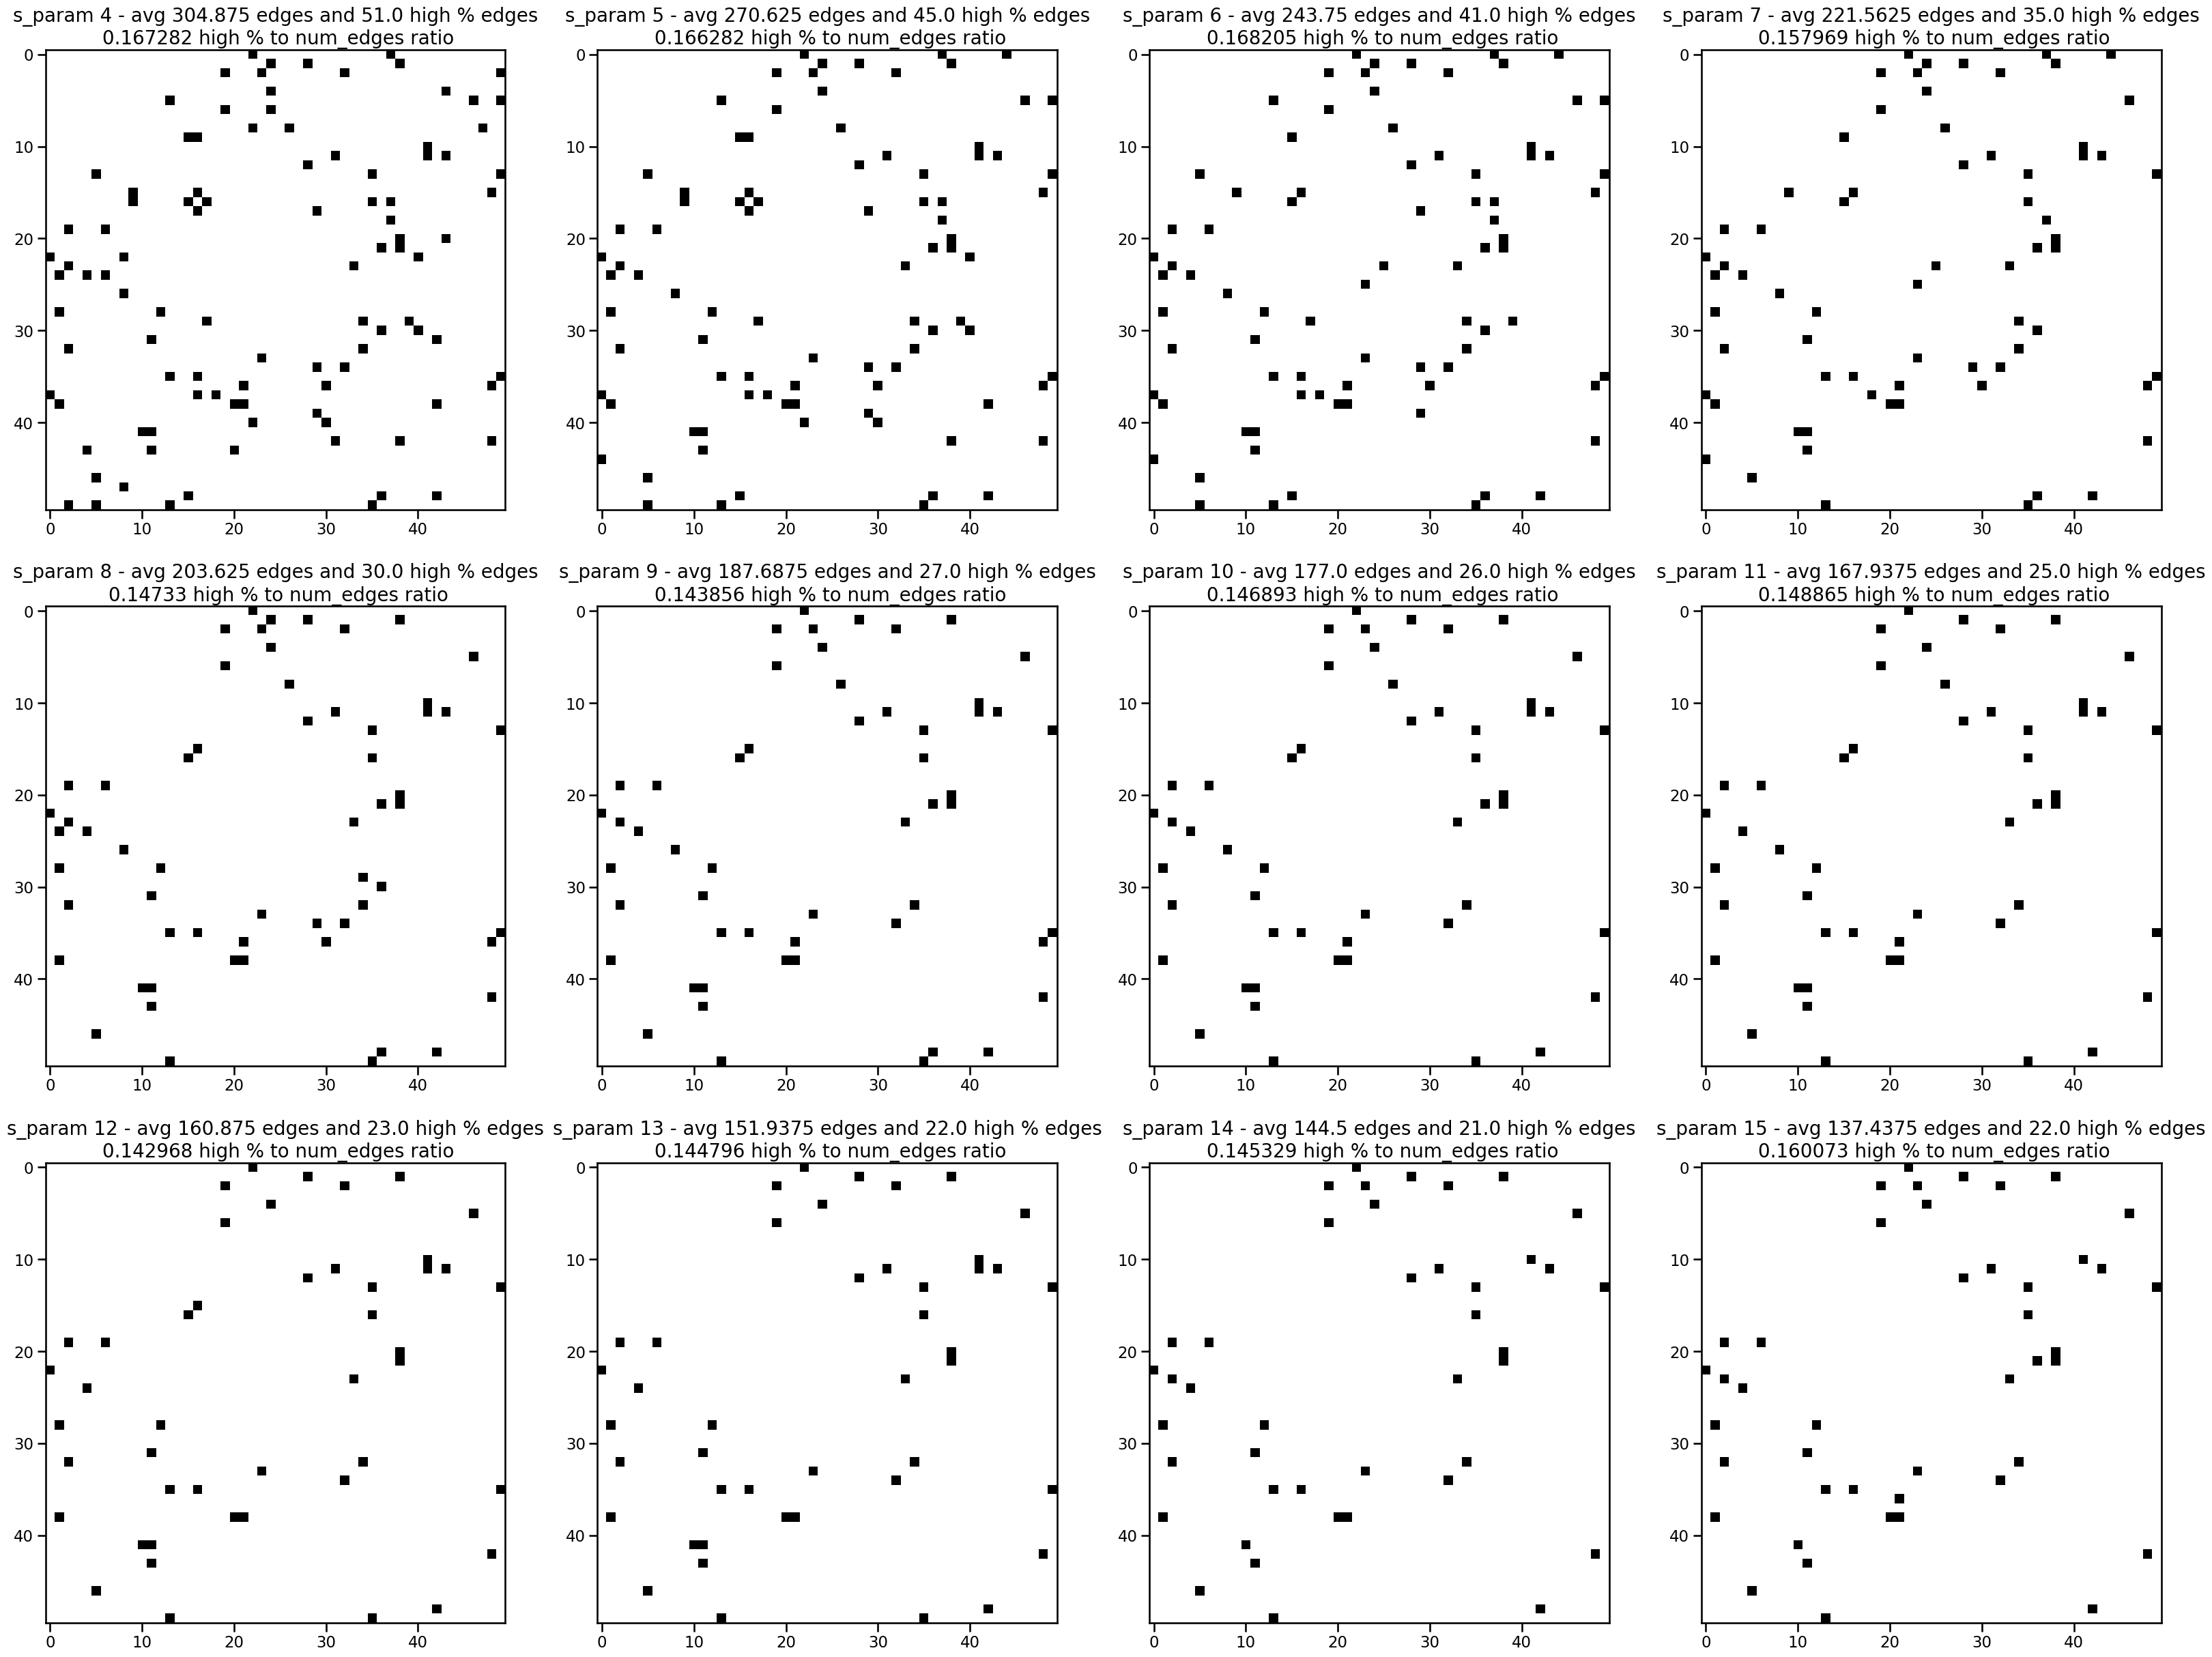

In [4]:
fig, axs = plt.subplots(3, 4, figsize=(40,30))

for i, ax in enumerate(axs.flatten()):
    high_percent_edges = np.where(avg_adj_mats_per_s[i] >= 0.9, 1, 0)
    num_high_percent_edges = np.sum(high_percent_edges)
    ax.imshow(high_percent_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f's_param {sparsity_params[i]} - avg {avg_num_edges_per_s[i]/2} edges and {num_high_percent_edges/2} high % edges\n {round(num_high_percent_edges/avg_num_edges_per_s[i], 6)} high % to num_edges ratio', fontsize=20)

print('Edges with >90% agreement across subjects per sparsity parameter')

In [5]:
highest_s_adj_mat = avg_adj_mats_per_s[-1]
highest_s_high_percent_edges = np.where(highest_s_adj_mat >= 0.9, 1, 0)

edge_names = edge_names_from_adj_mat(highest_s_high_percent_edges)
print(edge_names)

[(0, 22), (1, 28), (1, 38), (2, 19), (2, 23), (2, 32), (4, 24), (5, 46), (6, 19), (10, 41), (11, 31), (11, 43), (12, 28), (13, 35), (13, 49), (16, 35), (20, 38), (21, 36), (21, 38), (23, 33), (32, 34), (42, 48)]


# Per subject part

In [6]:
sparsity_params = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
avg_adj_mats_per_s = []
avg_num_edges_per_s = []

for s in sparsity_params:
    avg_num_edges = 0
    adj_mats = []
    fges_results = []

    for part_data in all_data.values():
        edges, _ = fges_infer_edges(part_data, s)
        edges_mat = fges_edges_to_mat(edges, part_data.shape[1])
        adj_mats.append(edges_mat)
        avg_num_edges += np.sum(edges_mat)

    avg_adj_mats_per_s.append(np.mean(adj_mats, axis=0))
    avg_num_edges_per_s.append(avg_num_edges/len(all_data))

Edges with >90% agreement across subject parts per sparsity parameter


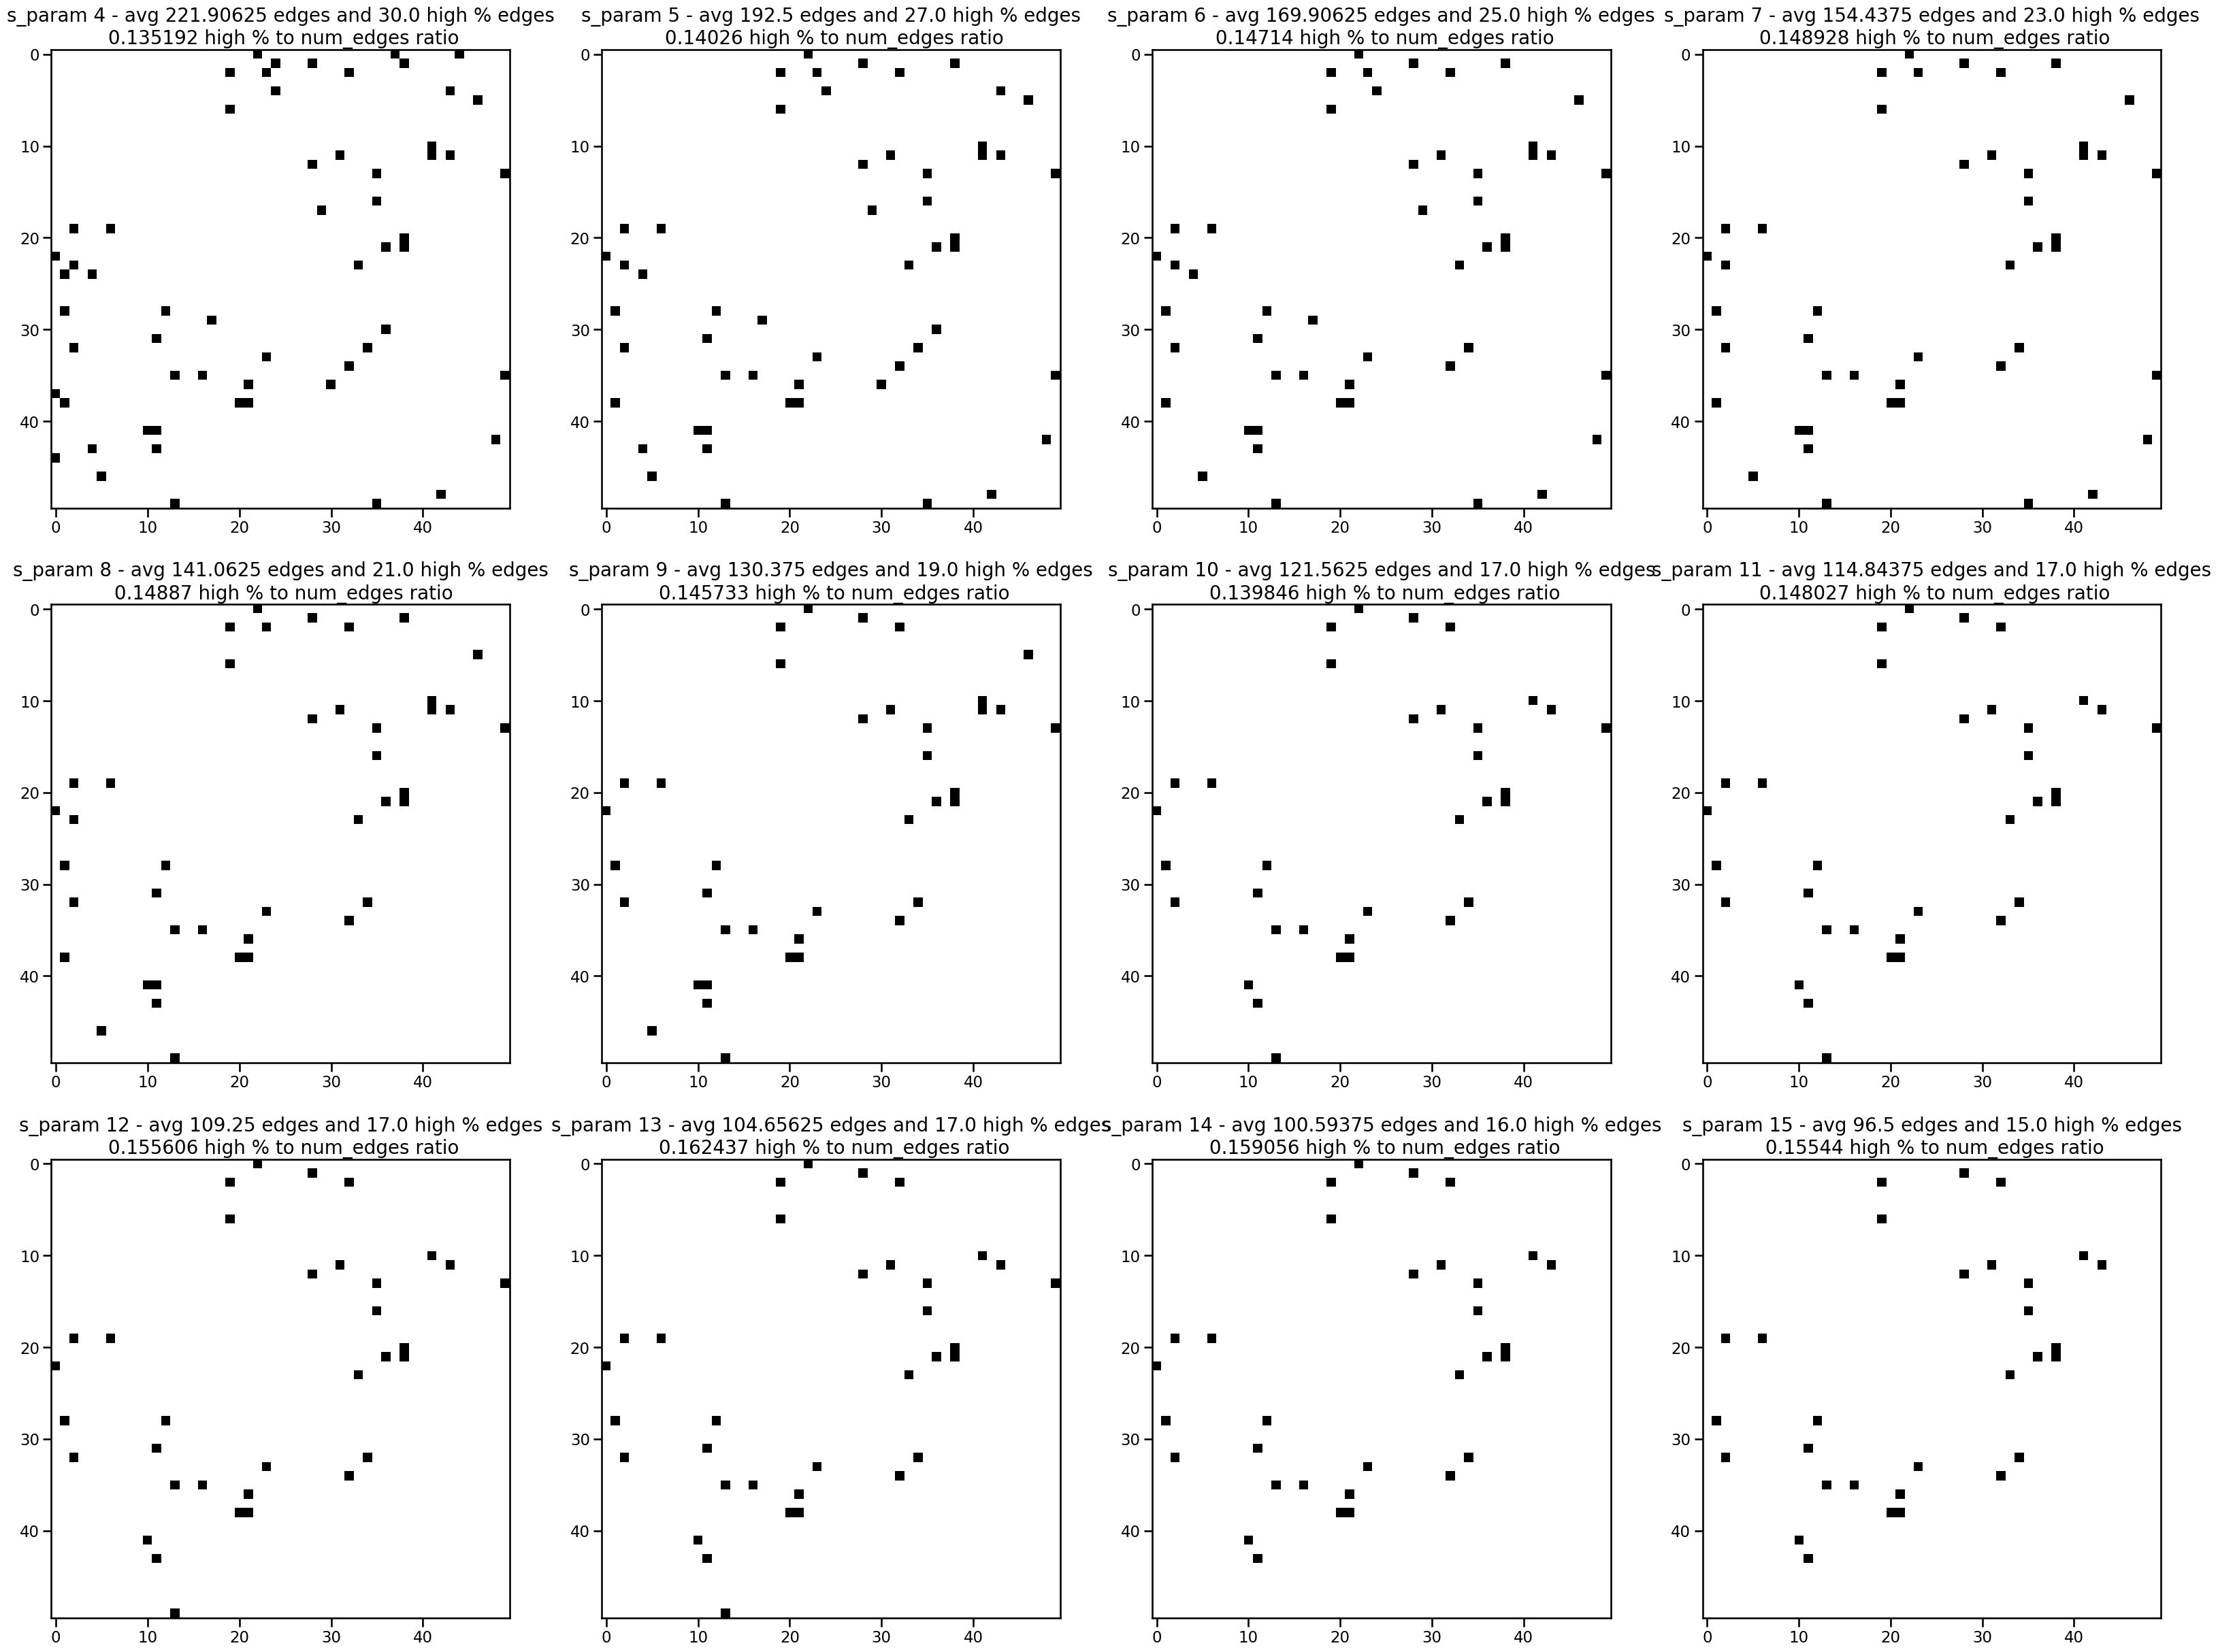

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(40,30))

for i, ax in enumerate(axs.flatten()):
    high_percent_edges = np.where(avg_adj_mats_per_s[i] >= 0.9, 1, 0)
    num_high_percent_edges = np.sum(high_percent_edges)
    ax.imshow(high_percent_edges, cmap='binary', interpolation='nearest')
    ax.set_title(f's_param {sparsity_params[i]} - avg {avg_num_edges_per_s[i]/2} edges and {num_high_percent_edges/2} high % edges\n {round(num_high_percent_edges/avg_num_edges_per_s[i], 6)} high % to num_edges ratio', fontsize=20)

print('Edges with >90% agreement across subject parts per sparsity parameter')

In [8]:
highest_s_adj_mat = avg_adj_mats_per_s[-1]
highest_s_high_percent_edges = np.where(highest_s_adj_mat >= 0.9, 1, 0)

edge_names = edge_names_from_adj_mat(highest_s_high_percent_edges)
print(edge_names)

[(1, 28), (2, 19), (2, 32), (6, 19), (10, 41), (11, 31), (11, 43), (12, 28), (13, 35), (16, 35), (20, 38), (21, 36), (21, 38), (23, 33), (32, 34)]
